MovieWriter ffmpeg unavailable; using Pillow instead.


ValueError: unknown file extension: .mp4

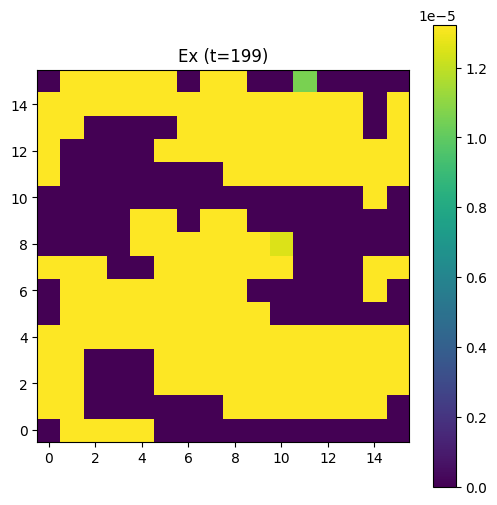

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

def read_slice_binary(filename):
    with open(filename, "rb") as f:
        Nx = np.fromfile(f, dtype=np.int32, count=1)[0]
        Ny = np.fromfile(f, dtype=np.int32, count=1)[0]
        Nz = np.fromfile(f, dtype=np.int32, count=1)[0]
        slice_k = np.fromfile(f, dtype=np.int32, count=1)[0]

        raw = np.fromfile(f, dtype=np.float64)
        data = raw.reshape((Ny, Nx, 6))

    return data, Nx, Ny, Nz, slice_k

# ファイルリスト
slice_files = [f"out/slice_t{t}.bin" for t in range(200)]
Nt = len(slice_files)

# 最初のファイルからサイズを取得
sample, Nx, Ny, Nz, slice_k = read_slice_binary(slice_files[0])

Ex_all = np.zeros((Nt, Ny, Nx))

for t,fname in enumerate(slice_files):
    d, *_ = read_slice_binary(fname)
    Ex_all[t] = d[:,:,0]

# アニメ
fig, ax = plt.subplots(figsize=(6,6))
im = ax.imshow(Ex_all[0], origin='lower', animated=True)
plt.colorbar(im, ax=ax)
ax.set_title("Ex (t=0)")

def update(frame):
    im.set_array(Ex_all[frame])
    ax.set_title(f"Ex (t={frame})")
    return [im]

ani = FuncAnimation(fig, update, frames=Nt, interval=50, blit=True)
ani.save("Ex_animation.gif", fps=20)
plt.show()
